Analyze data from NP_11_66

In [1]:
# Imports

import numpy as np
import itertools
import math
import pandas as pd
import time
import Bio
from Bio import SeqIO
from Bio.Seq import Seq
import matplotlib
import matplotlib.pyplot as plt
from ast import literal_eval
import csv
import venn
from numpy import cov
from scipy.stats import spearmanr, pearsonr
from numpy import cov
import seaborn as sns

In [2]:
# This information has to be input manually
# File names, barcode flank sequences

flankSeq = 'TTCCGTACGA'

# Enumerate all of the flank sequences that are 1 different from the correct one

flankSeqsOBO = []
for position, letter in enumerate(flankSeq):
    for nuc in ['A', 'T', 'G', 'C']:
        if flankSeq[position] != nuc:
            flankSeqsOBO.append(flankSeq[:position] + nuc + flankSeq[position + 1 :])

# Data files

listOfFileNames = [
    'NP_11_64_2', 
    'NP_11_64_9',
    'NP_11_64_11', 'NP_11_64_12', 'NP_11_64_13', 
    'NP_11_64_15', 
    'NP_11_66_1',  'NP_11_66_2',  'NP_11_66_3', 
    'NP_11_66_4',  'NP_11_66_5',  'NP_11_66_6',
    'NP_11_66_7',  'NP_11_66_8',  'NP_11_66_9', 
    'NP_11_66_10', 'NP_11_66_11', 'NP_11_66_12', 
    'NP_11_66_13', 'NP_11_66_14', 'NP_11_66_15', 
    'NP_11_66_16', 'NP_11_66_17', 'NP_11_66_18', 
    'NP_11_66_19', 'NP_11_66_20', 'NP_11_66_21', 
    'NP_11_66_22', 'NP_11_66_23', 'NP_11_66_24', 
    'NP_11_66_25', 'NP_11_66_26', 'NP_11_66_27', 
    'NP_11_66_28', 'NP_11_66_29', 'NP_11_66_30', 
    'NP_11_66_31', 'NP_11_66_32', 'NP_11_66_33', 
    'NP_11_66_34', 'NP_11_66_35', 'NP_11_66_36', 
    'NP_11_66_37', 'NP_11_66_38', 'NP_11_66_39', 
    'NP_11_66_40', 'NP_11_66_41'
                  ]

listOfFiles = []
for file in listOfFileNames:
    listOfFiles.append('/Users/noamprywes/NP_11_66_data/' + 
                      file + '.fastq')
    

In [30]:
# Parse and extract barcode, make csv files for each one
# Check for flank even if there's one mistake

def parseAndExtractBC(file):
    parsedFile = SeqIO.parse(file, "fastq")
    BClist = []
    for readCount, rec in enumerate(parsedFile):
        BCloc = -1
#         if readCount > 20:
#             break
        if readCount % 3000000 == 0:
            print(readCount)
        readSeq = str(rec.seq)
        BCloc = readSeq.find(flankSeq)
        if BCloc == -1:
            for OBOseq in flankSeqsOBO:
                BCloc = readSeq.find(OBOseq)
                if BCloc > -1:
                    break
        if BCloc == -1:
            BClist.append('No flank found')
        else:
            BC = readSeq[BCloc + len(flankSeq) : BCloc + len(flankSeq) + 30]
            if 'N' in BC:
                BClist.append('BC has Ns')
            else:
                BClist.append(BC)
    return BClist

# These files can be big, save them on a drive if necessary
for i, file in enumerate(listOfFiles):
    print(listOfFileNames[i])
    dfBClist = pd.DataFrame(parseAndExtractBC(file), columns = [listOfFileNames[i]])
    dfBClist.to_csv('/Users/noamprywes/NP_11_66_42/BCLists/' + listOfFileNames[i] + '_BClist.csv')
    
    

NP_11_64_2
0
3000000
6000000
NP_11_64_9
0
3000000
6000000
NP_11_64_11
0
3000000
6000000
9000000
NP_11_64_12
0
3000000
6000000
9000000
NP_11_64_13
0
3000000
6000000
NP_11_64_15
0
3000000
6000000
NP_11_66_1
0
3000000
NP_11_66_2
0
3000000
NP_11_66_3
0
3000000
6000000
NP_11_66_4
0
3000000
6000000
9000000
NP_11_66_5
0
3000000
6000000
9000000
12000000
15000000
NP_11_66_6
0
3000000
6000000
9000000
12000000
15000000
18000000
NP_11_66_7
0
3000000
6000000
9000000
12000000
15000000
NP_11_66_8
0
3000000
6000000
9000000
12000000
NP_11_66_9
0
3000000
6000000
9000000
12000000
15000000
18000000
NP_11_66_10
0
3000000
6000000
9000000
12000000
15000000
NP_11_66_11
0
3000000
6000000
9000000
12000000
15000000
18000000
NP_11_66_12
0
3000000
6000000
NP_11_66_13
0
3000000
6000000
9000000
NP_11_66_14
0
3000000
6000000
9000000
NP_11_66_15
0
3000000
6000000
9000000
NP_11_66_16
0
3000000
6000000
9000000
12000000
NP_11_66_17
0
3000000
6000000
9000000
12000000
NP_11_66_18
0
3000000
6000000
9000000
NP_11_66_19
0
300

In [31]:
# Collapse down to smaller list with reads per barcode measured

for i, file in enumerate(listOfFiles):
    dfBCs = pd.read_csv('/Users/noamprywes/NP_11_66_42/BCLists/' + listOfFileNames[i] + '_BClist.csv')
    dfBCCounts = dfBCs[listOfFileNames[i]].value_counts()
    dfBCCounts.to_csv('/Users/noamprywes/Google_Drive/Lab_notebooks/IGI/NP-11-Rr_library/NP-11-66/BCCounts/' + 
                      listOfFileNames[i] + '_BCCounts.csv', index = True)
    
    

In [3]:
# This code can generate BC counts but slowly:

# Information about samples

t0Lookup = {'NP_11_64_11' : ['NP_11_66_1', 'NP_11_66_4', 'NP_11_66_7', 'NP_11_66_10', 'NP_11_66_13',
                            'NP_11_66_16', 'NP_11_66_19', 'NP_11_66_22', 'NP_11_66_25', 'NP_11_66_28',
                            'NP_11_66_31', 'NP_11_66_34', 'NP_11_66_37', 'NP_11_66_40', 'NP_11_66_41'],
            'NP_11_64_12' : ['NP_11_66_2', 'NP_11_66_5', 'NP_11_66_8', 'NP_11_66_11', 'NP_11_66_14',
                            'NP_11_66_17', 'NP_11_66_20', 'NP_11_66_23', 'NP_11_66_26', 'NP_11_66_29',
                            'NP_11_66_32', 'NP_11_66_35', 'NP_11_66_38'],
            'NP_11_64_13' : ['NP_11_66_3', 'NP_11_66_6', 'NP_11_66_9', 'NP_11_66_12', 'NP_11_66_15',
                            'NP_11_66_18', 'NP_11_66_21', 'NP_11_66_24', 'NP_11_66_27', 'NP_11_66_30',
                            'NP_11_66_33', 'NP_11_66_36', 'NP_11_66_39']}

def get_t0(t0Lookup, experiment):
    for t0s, experiments in t0Lookup.items():
        if experiment in experiments:
            return t0s
    return None

conditionsKey = {
    'WT_only'            : ['NP_11_64_2'],
    't0'                 : ['NP_11_64_9', 'NP_11_64_11', 'NP_11_64_12', 'NP_11_64_13', 'NP_11_64_15'],
    '0.04%_CO2'          : ['NP_11_66_41'],
    '0.2%_CO2'           : ['NP_11_66_1',  'NP_11_66_2',  'NP_11_66_3'],
    '0.3%_CO2'           : ['NP_11_66_7',  'NP_11_66_8',  'NP_11_66_9'],
    '0.4%_CO2'           : ['NP_11_66_4',  'NP_11_66_5',  'NP_11_66_6'],
    '1%_CO2'             : ['NP_11_66_10', 'NP_11_66_11', 'NP_11_66_12'],
    '5%_CO2_20uM_IPTG'   : ['NP_11_66_13', 'NP_11_66_14', 'NP_11_66_15', 
                            'NP_11_66_16', 'NP_11_66_17', 'NP_11_66_18',
                            'NP_11_66_37', 'NP_11_66_38', 'NP_11_66_39'],
    '0uM_IPTG'           : ['NP_11_66_19', 'NP_11_66_20', 'NP_11_66_21'],
    '5uM_IPTG'           : ['NP_11_66_22', 'NP_11_66_23', 'NP_11_66_24'],
    '30uM_IPTG'          : ['NP_11_66_25', 'NP_11_66_26', 'NP_11_66_27'],
    '100uM_IPTG'         : ['NP_11_66_28', 'NP_11_66_29', 'NP_11_66_30'],
    '300uM_IPTG'         : ['NP_11_66_31', 'NP_11_66_32', 'NP_11_66_33'],
    '1000uM_IPTG'        : ['NP_11_66_34', 'NP_11_66_35', 'NP_11_66_36'],
    'Xylose'             : ['NP_11_66_40']
    
}

In [4]:
# Parse out data, incorporate PacBio and biochemistry, categorize reads

# Make a BCCounts dataframe
# Include lookup tables from pacbio

BCCountsDF = pd.read_csv('/Users/noamprywes/Google_Drive/Lab_notebooks/IGI/NP-11-Rr_library/NP-11-64/NP_11_64_10_allBarcodes.csv').drop(columns = 'Unnamed: 0')

# Get reads from BCCount files

for i, experiment in enumerate(listOfFileNames):
    dfData = pd.read_csv('BCCounts/' + listOfFileNames[i] + '_BCCounts.csv',
                         index_col = 0).rename(columns = {'count' : experiment})
    dfData.index.name = 'Barcode'
    BCCountsDF = BCCountsDF.merge(dfData, on = 'Barcode', how = 'outer')
BCCountsDF = BCCountsDF.convert_dtypes()

# Load reference biochemistry data

refData = pd.read_csv('biochemData061823.csv')
BCCountsDF = BCCountsDF.merge(refData, left_on = 'RbcLCodonMut', right_on = 'Mutation', how = 'outer')
BCCountsDF = BCCountsDF.convert_dtypes()

# Label barcodes
BCCountsDF.loc[(BCCountsDF['BackboneMut'] == False) &
               (BCCountsDF['InsertionsFound'] == False) &
               (BCCountsDF['DeletionsFound'] == False) &
               (BCCountsDF['PRKmut'] == False), 'BC_Category'] = 'Verified'

BCCountsDF.loc[(BCCountsDF['BackboneMut'] == True), 'BC_Category'] = 'BackboneMut'
BCCountsDF.loc[(BCCountsDF['InsertionsFound'] == True), 'BC_Category'] = 'InsertionsFound'
BCCountsDF.loc[(BCCountsDF['DeletionsFound'] == True), 'BC_Category'] = 'DeletionsFound'
BCCountsDF.loc[(BCCountsDF['PRKmut'] == True), 'BC_Category'] = 'PRKmut'
BCCountsDF.loc[(BCCountsDF['RbcLCodonMut'] == 'Multiple_mutations'), 'BC_Category'] = 'Multiple_mutations'
BCCountsDF.loc[(BCCountsDF['RbcLCodonMut'] == 'Silent mutation'), 'BC_Category'] = 'Silent mutation'
BCCountsDF.loc[(BCCountsDF['RbcLCodonMut'] == 'Ambiguous_mutation'), 'BC_Category'] = 'Ambiguous_mutation'
BCCountsDF.loc[(BCCountsDF['RbcLCodonMut'] == 'Illegal_mutation'), 'BC_Category'] = 'Illegal_mutation'

# Find primer dimer barcodes

BCCountsDF.loc[BCCountsDF['Barcode'].str.contains('CGCGGGGATT'), 'BC_Category'] = 'Primer_Dimer'
# readsAndRefs.loc[readsAndRefs['Barcode'].str.contains('CGGGCGCGGGG'), 'BC_Category'] = 'Primer_Dimer'
BCCountsDF.loc[BCCountsDF['Barcode'].str.contains('AGGACGCGCGGGGAT'), 'BC_Category'] = 'Primer_Dimer'

# Label no BC reads

BCCountsDF.loc[BCCountsDF['Barcode'].str.contains('No flank found'), 'BC_Category'] = 'No_BC_in_read'

# Change remaining barcodes to "Unknown"

BCCountsDF[['BC_Category']] = BCCountsDF[['BC_Category']].fillna(value='Unknown')
BCCountsDF

,Barcode,Mutation_List,BackboneMut,InsertionsFound,DeletionsFound,PRKmut,RbcLCodonMut,originalAA,AApos,mutAA,...,vo (s^-1),Ko (uM O2),Sc/o,Sc/o error (+/-),Temperature,pH,citation,Note,year,BC_Category
0,CATTACTACTCGATGGTGAGCTCTCTGAGG,[],False,False,False,False,WT,X,0,Y,...,1.4,159,9.0,0.3,25,8.0,Mueller-Cajar et al. Biochemistry 2007,<NA>,2007,Verified
1,GACCTACTAGAAAAACGAGCCATGCTTAAG,"[['A', 3737, None], ['G', 3738, None], ['G', 3...",True,True,False,False,WT,X,0,Y,...,1.4,159,9.0,0.3,25,8.0,Mueller-Cajar et al. Biochemistry 2007,<NA>,2007,InsertionsFound
2,GACCATTAGGCTAAACTACCCATGCTTAAG,"[['A', 3737, None], ['G', 3738, None], ['G', 3...",True,True,False,False,WT,X,0,Y,...,1.4,159,9.0,0.3,25,8.0,Mueller-Cajar et al. Biochemistry 2007,<NA>,2007,InsertionsFound
3,GACCTCGCAGCATAGATTACCATGCTTAAG,"[['A', 3737, None], ['G', 3738, None], ['G', 3...",True,True,False,False,WT,X,0,Y,...,1.4,159,9.0,0.3,25,8.0,Mueller-Cajar et al. Biochemistry 2007,<NA>,2007,InsertionsFound
4,AGGAATTGTCTGCTTATATGGTTAACGGAT,[],False,False,False,False,WT,X,0,Y,...,1.4,159,9.0,0.3,25,8.0,Mueller-Cajar et al. Biochemistry 2007,<NA>,2007,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22615030,TTACGACATTCTGGACATATTGGTCAAATG,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown
22615031,TATGCATTTGCTGATTGCATTTCCTTTCCA,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown
22615032,GTGTTATGGATTTTTTAATATCTAACTTGG,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown
22615033,ACAATGACACTTTAAACAATAATTATATGG,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown


In [5]:
# Save .csv files, just verified barcodes will be used for further analysis

# BCCountsDF.to_csv('BCCountsDF061323.csv')

verifiedBCCountsDF = BCCountsDF[BCCountsDF['BC_Category'] == 'Verified']

verifiedBCCountsDF = verifiedBCCountsDF.drop(columns = ['Mutation_List',
                                   'BackboneMut',
                                   'InsertionsFound',
                                   'DeletionsFound',
                                   'PRKmut',
                                   'Mutation',
                                   'BC_Category'], axis = 1)

verifiedBCCountsDF.to_csv('verifiedBCCountsDF061823.csv')


Verified reads: 45.6%


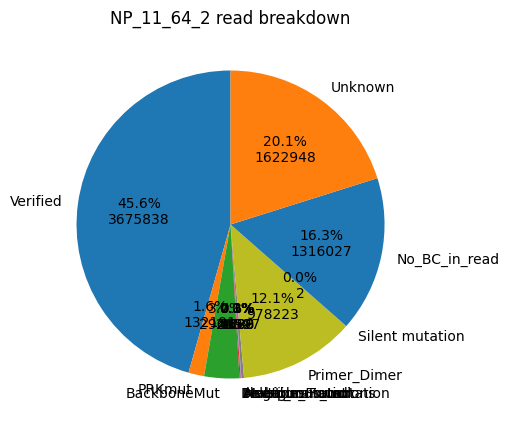

Verified reads: 20.2%


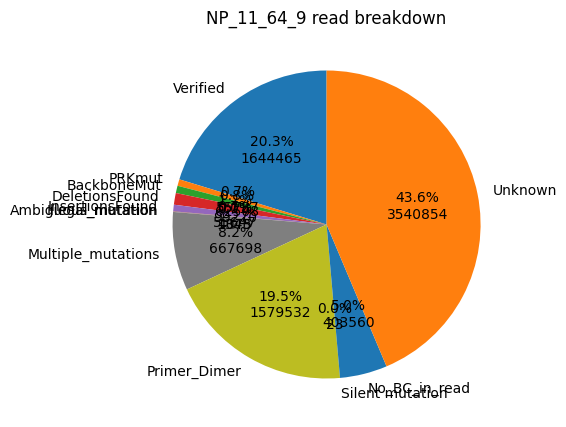

Verified reads: 21.5%


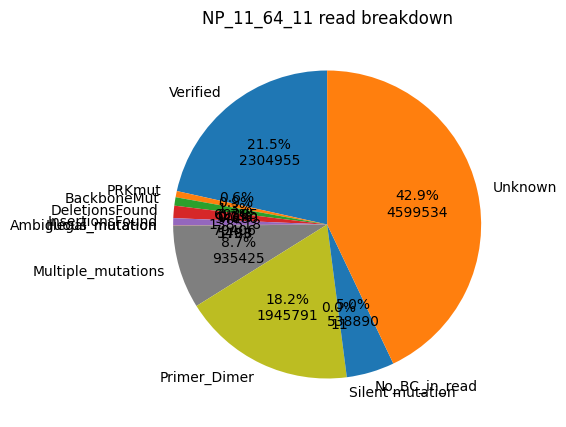

Verified reads: 22.6%


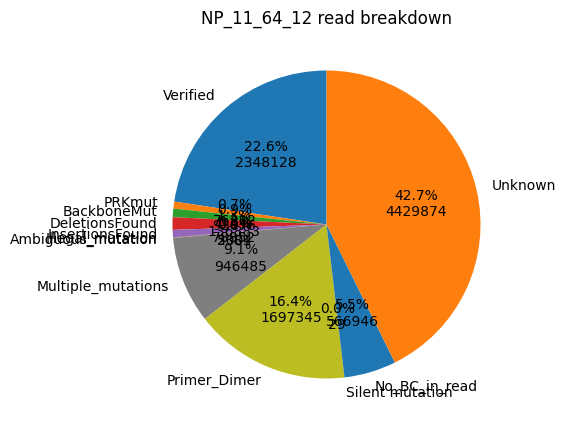

Verified reads: 19.3%


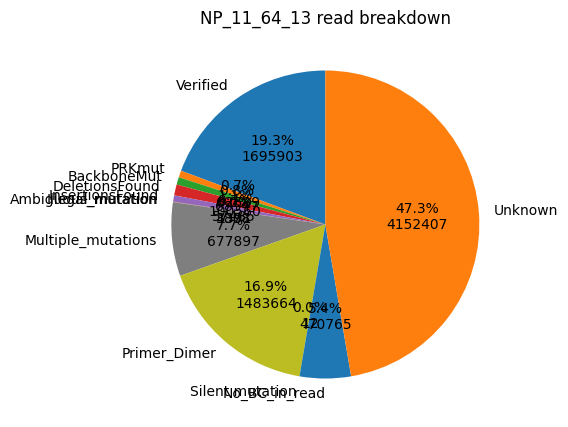

Verified reads: 19.5%


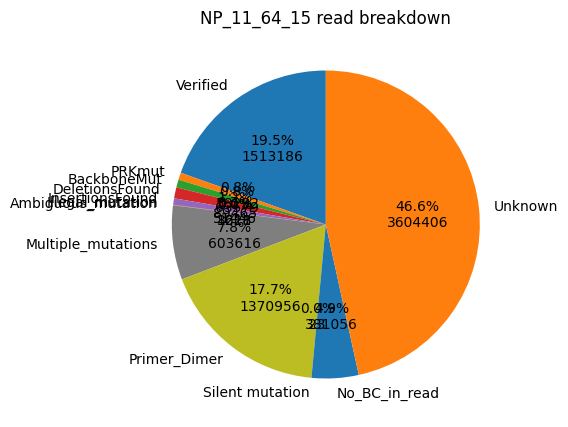

Verified reads: 7.92%


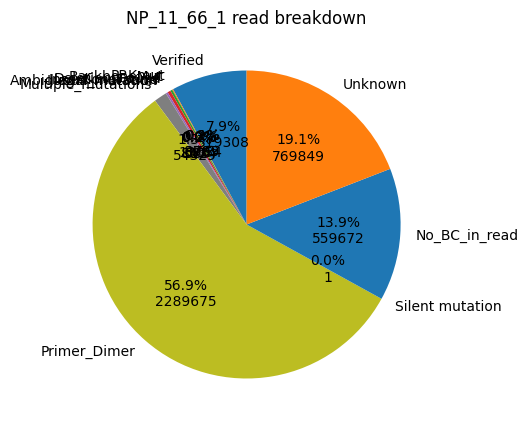

Verified reads: 12.7%


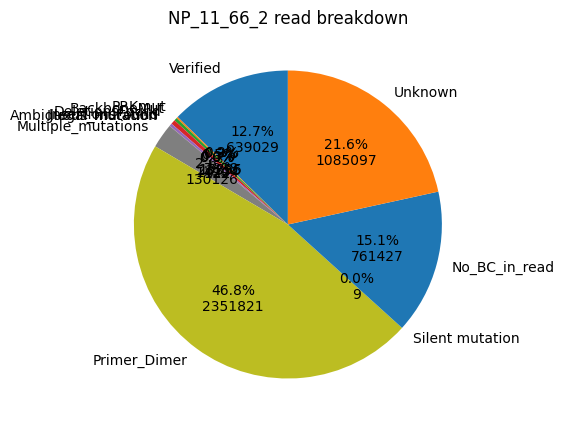

Verified reads: 18.6%


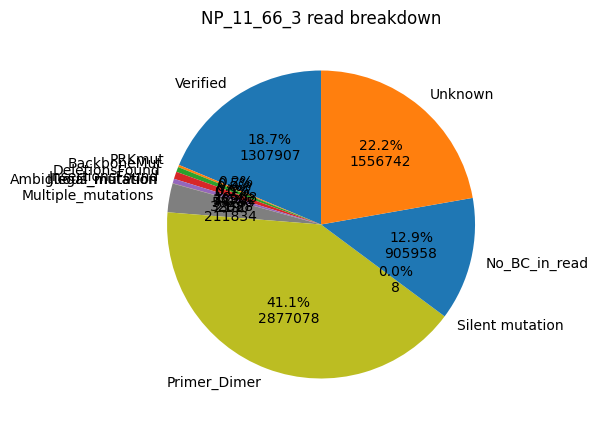

Verified reads: 20.8%


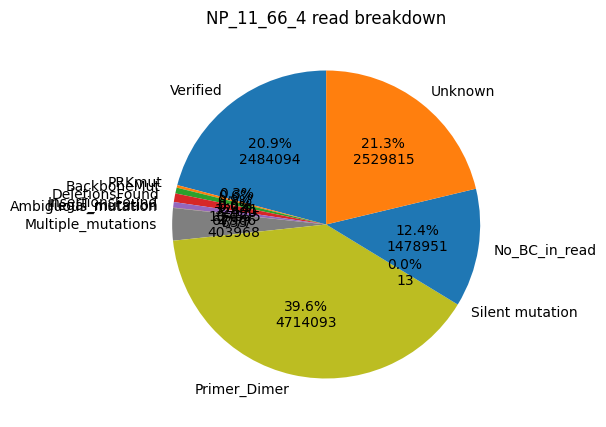

Verified reads: 24.4%


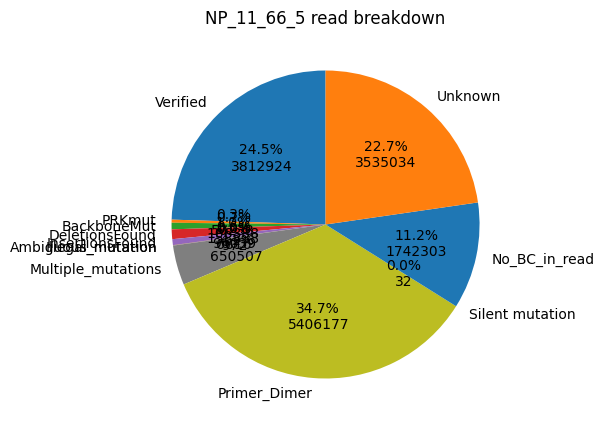

Verified reads: 25.3%


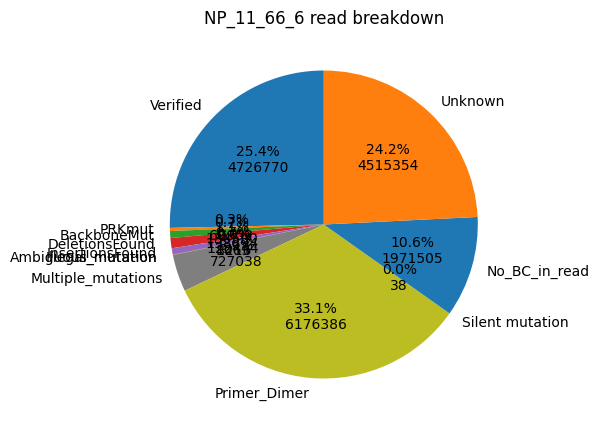

Verified reads: 23.8%


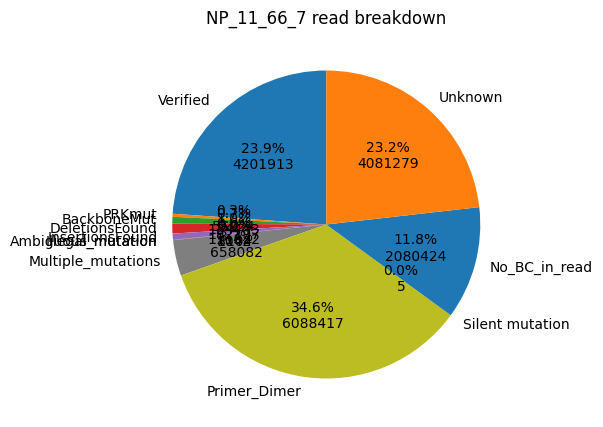

Verified reads: 25.0%


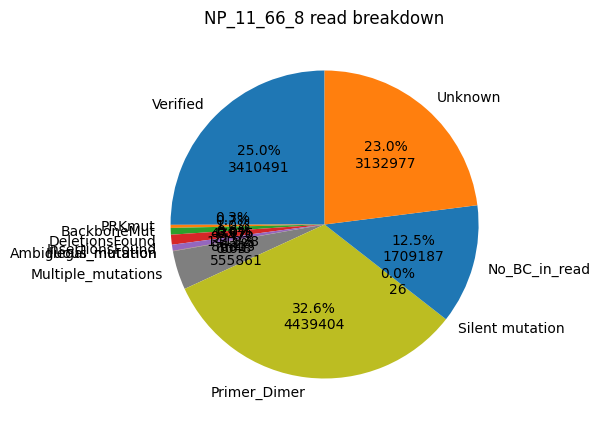

Verified reads: 29.0%


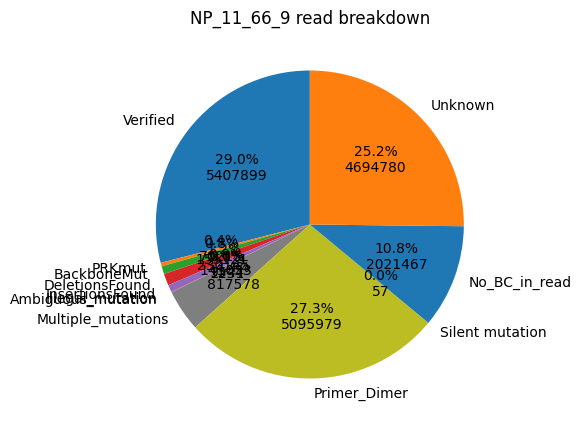

Verified reads: 20.9%


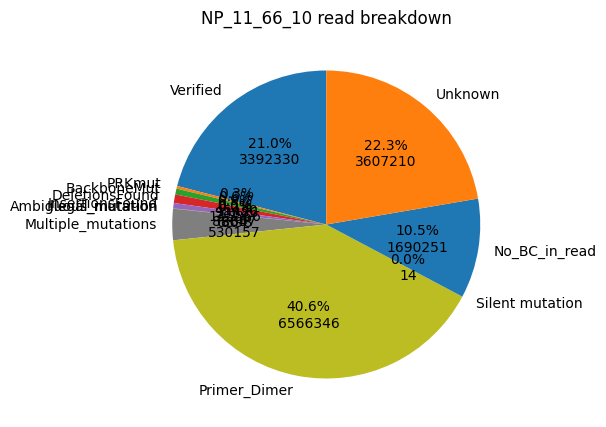

Verified reads: 19.6%


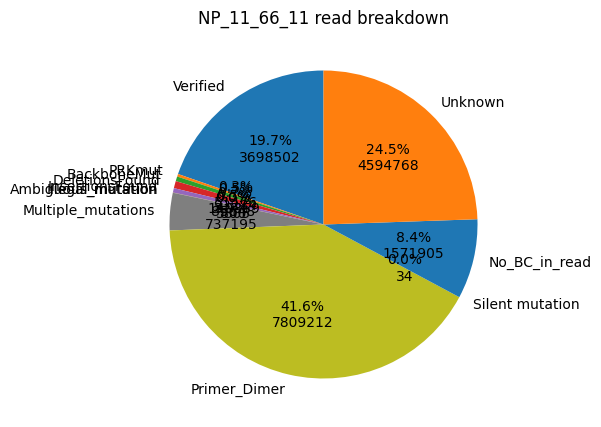

Verified reads: 6.45%


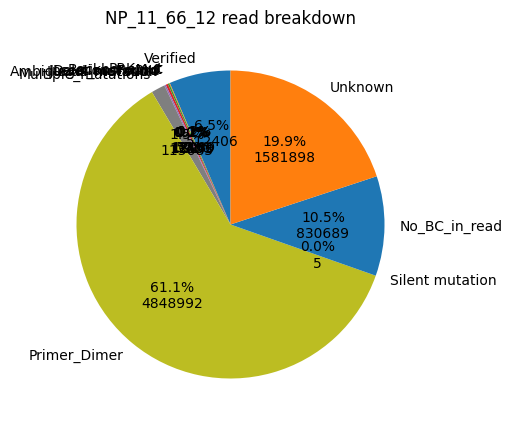

Verified reads: 14.7%


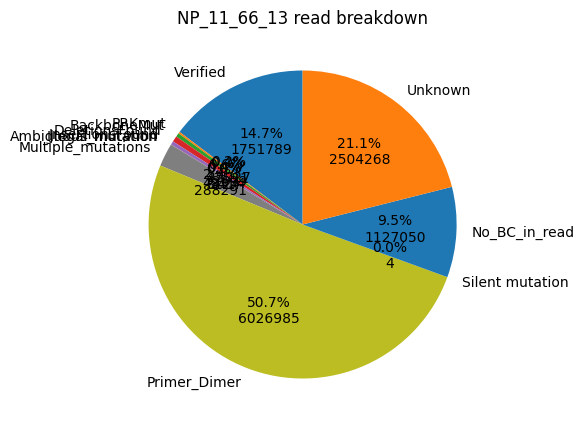

Verified reads: 26.3%


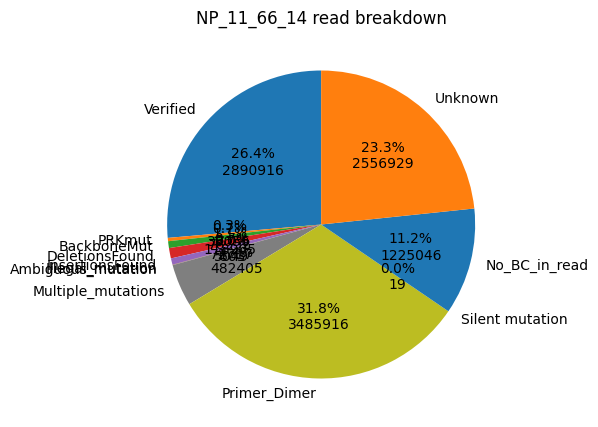

Verified reads: 29.6%


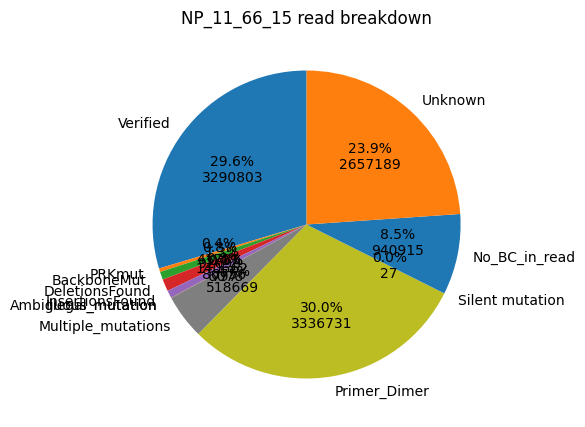

Verified reads: 26.3%


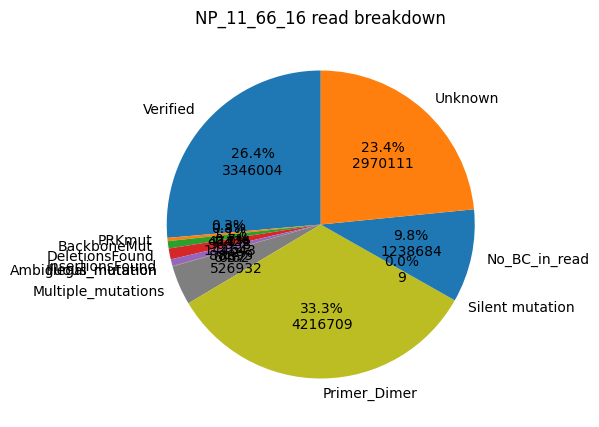

Verified reads: 28.0%


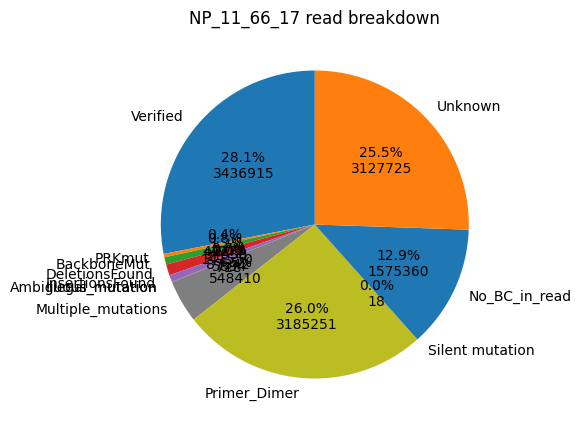

Verified reads: 28.1%


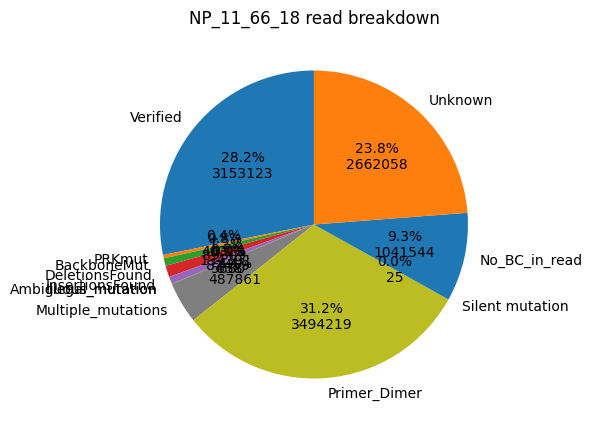

Verified reads: 29.5%


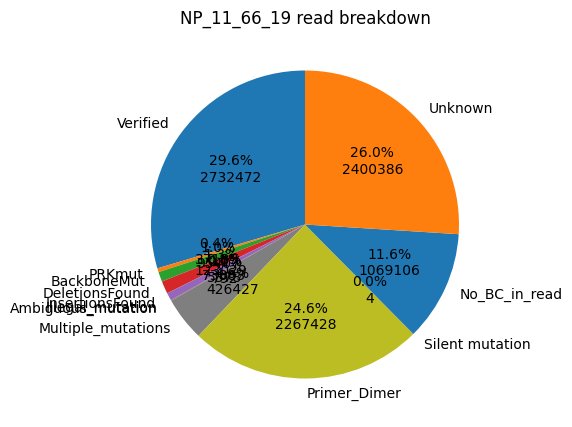

Verified reads: 23.6%


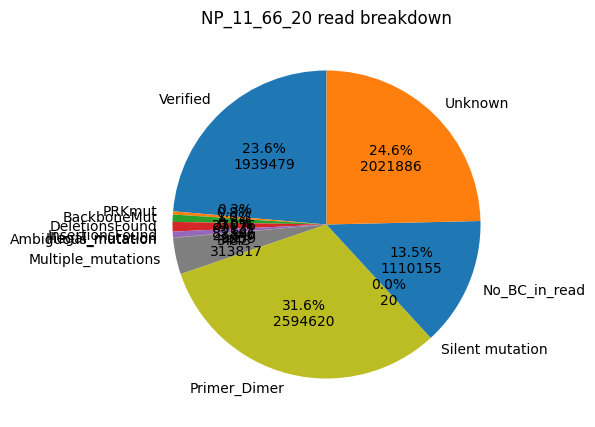

Verified reads: 15.8%


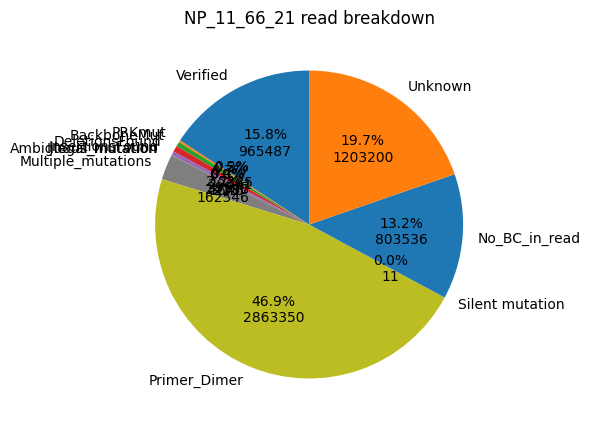

Verified reads: 24.1%


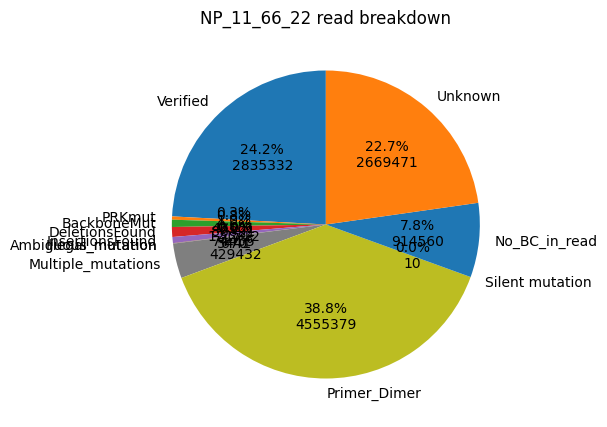

Verified reads: 27.6%


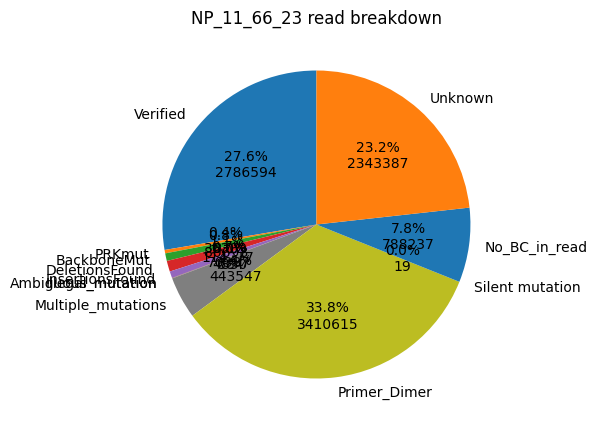

Verified reads: 27.0%


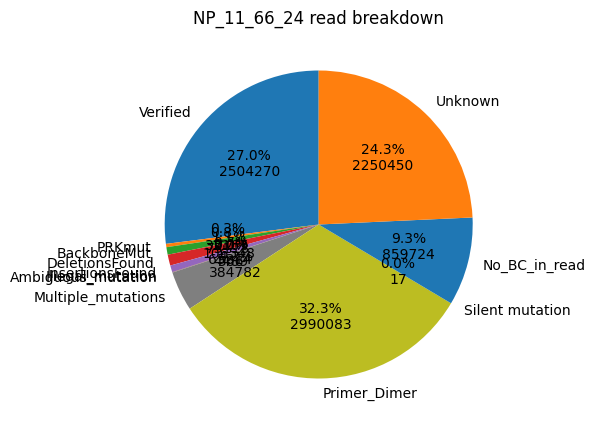

Verified reads: 26.6%


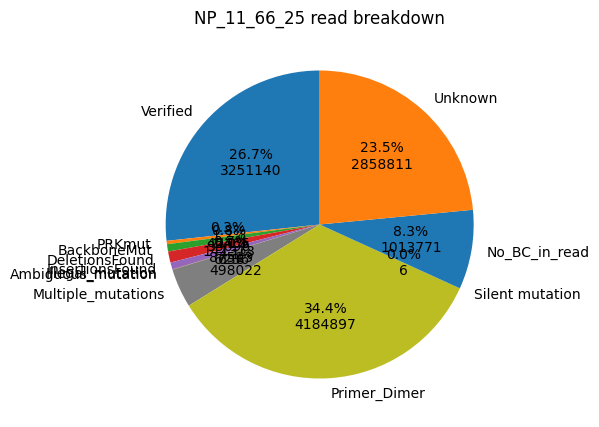

Verified reads: 29.9%


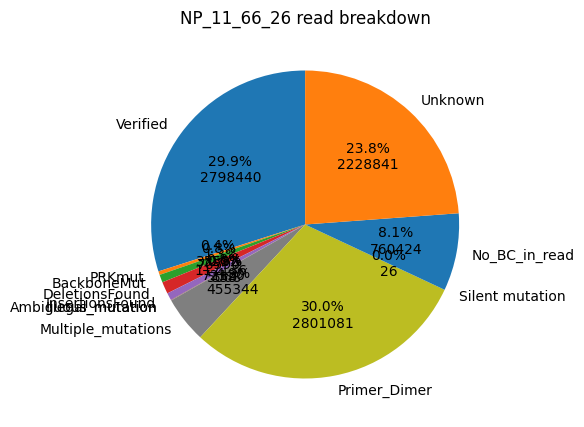

Verified reads: 30.5%


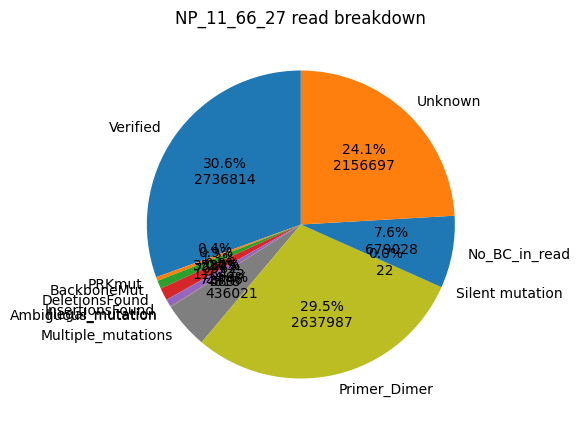

Verified reads: 30.1%


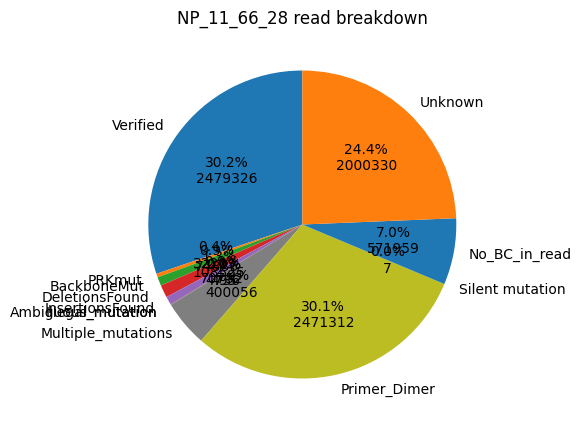

Verified reads: 32.3%


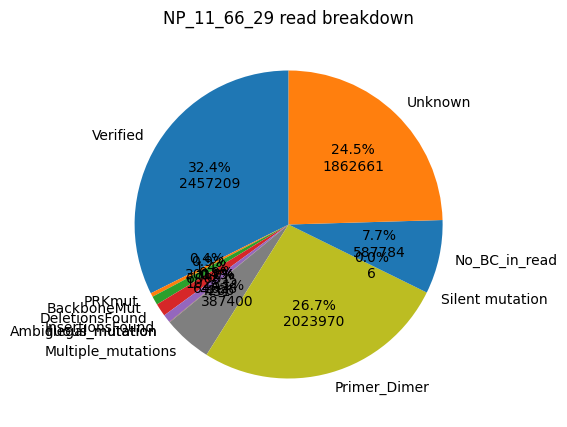

Verified reads: 30.9%


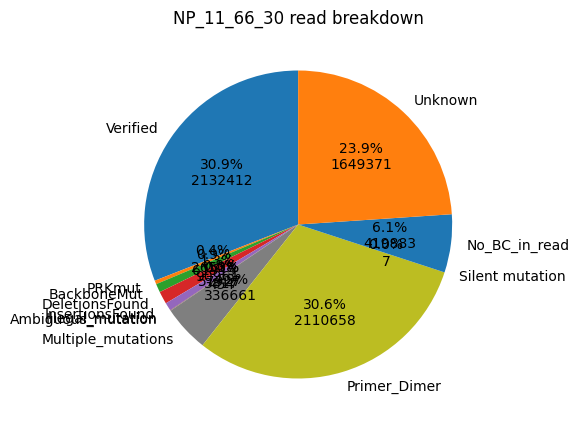

Verified reads: 29.5%


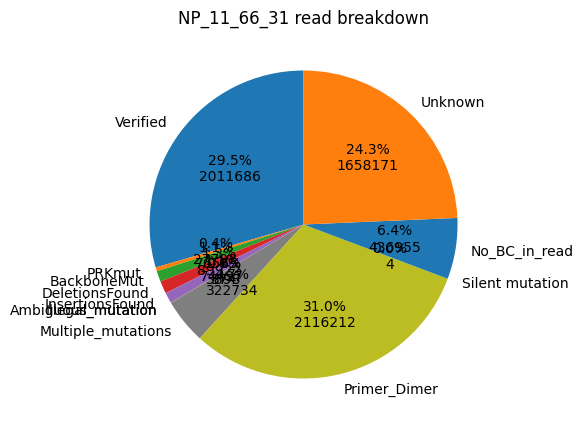

Verified reads: 32.9%


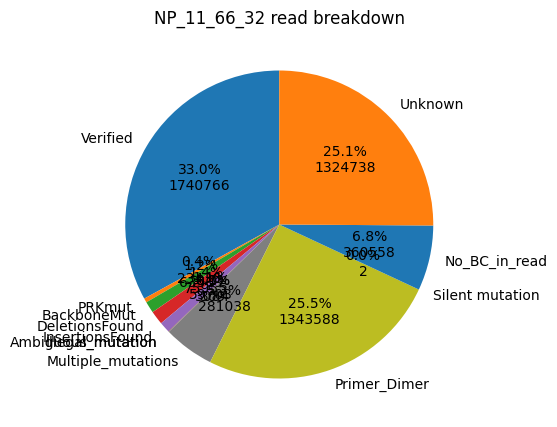

Verified reads: 30.4%


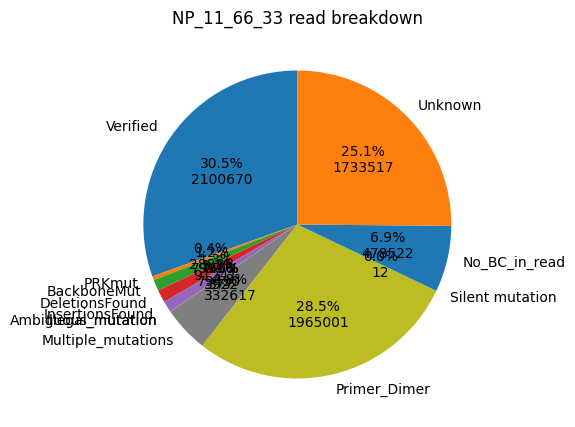

Verified reads: 26.4%


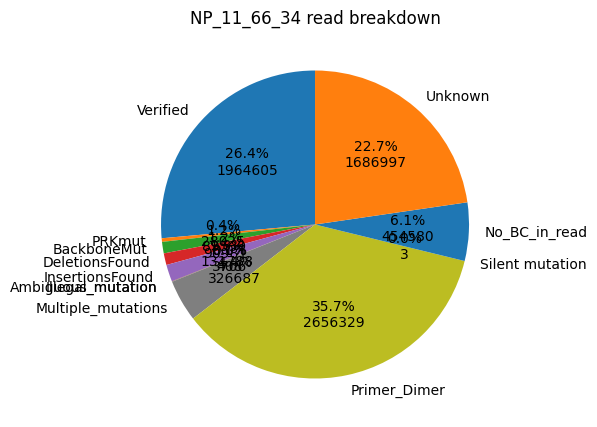

Verified reads: 30.0%


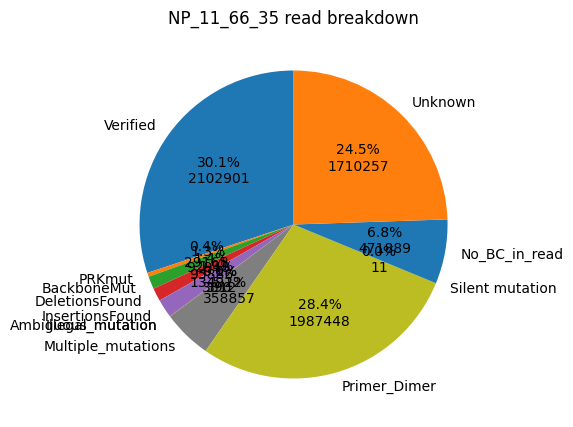

Verified reads: 27.2%


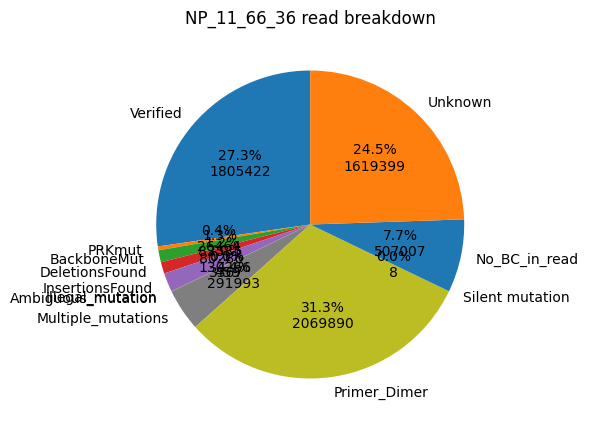

Verified reads: 24.4%


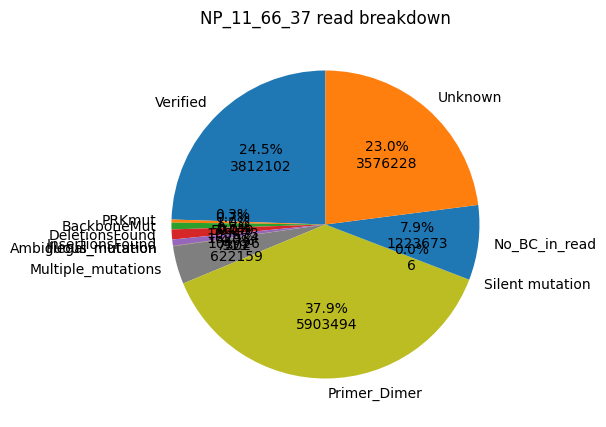

Verified reads: 31.3%


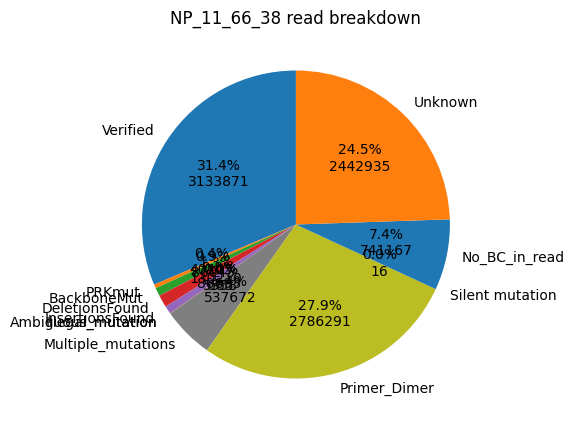

Verified reads: 30.7%


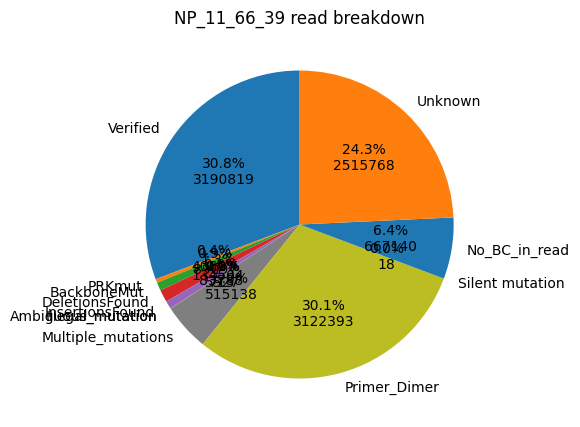

Verified reads: 29.8%


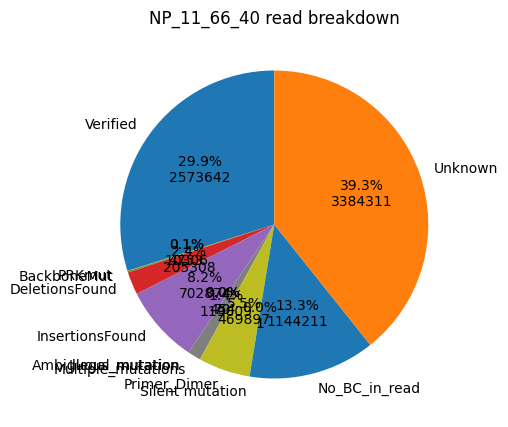

Verified reads: 30.8%


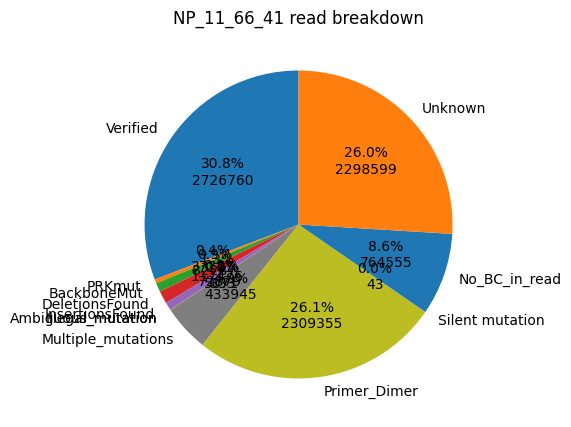

In [6]:
# Make pie charts of read breakdowns

dataForPie = {}

for i, experiment in enumerate(listOfFileNames):
    expData = BCCountsDF[['Barcode', experiment, 'BC_Category']].dropna()
    dataForPie[experiment] = {}
    for category in expData['BC_Category'].unique():
        dataForPie[experiment][category] = expData[expData['BC_Category'] == category][experiment].sum()
        
dataForPie = pd.DataFrame(dataForPie)

# Pie charts

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n{absolute:d}"

for i, experiment in enumerate(listOfFileNames):
    fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))
    wedges, texts, autotexts = ax.pie(dataForPie[experiment], 
                                  autopct=lambda pct: func(pct, dataForPie[experiment]),
                                  textprops=dict(color="black"),
                                     labels = dataForPie.index,
                                     startangle = 90)
    plt.title(experiment + ' read breakdown')
    print('Verified reads: ' +
          str(100*(dataForPie[experiment]['Verified']/dataForPie[experiment].sum()))[:4] + '%')
    plt.savefig('PieCharts/' + experiment + ' readBreakdownPie.svg')
    plt.show()
